# House Prices Attempt I: Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../data/train.csv")
data_augmented = pd.read_csv("../data-augmented/train_augmented.csv")
print(data.shape)

(1460, 81)


In [3]:
from sklearn.linear_model import LinearRegression

X = data_augmented
y = data['SalePrice'][data_augmented.index]
cv_split = 5

model = LinearRegression()
model.fit(X,y);

In [4]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Accuracy: 0.80 (+/- 0.14)


So this cross validation (CV) accuracy value means that the model accounts for about 80% of the variance in the CV dataset. Not too bad for one of the simplest models I could think of, but not exactly ready to ship. Now I can adjust the model to try and maximize the CV score. First step is to add regularization by using a ridge regressor instead of a plain linear model, then optimize the regulraization paramater *alpha* to achieve the best cross validation score.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0, 0.03, .1, .3, 1, 3, 10, 30, 100, 300]}

grid = GridSearchCV(Ridge(),param_grid, cv = cv_split)
grid.fit(X,y)
model = grid.best_estimator_
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Accuracy: 0.83 (+/- 0.15)


<module 'matplotlib.pyplot' from 'C:\\Users\\mster\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

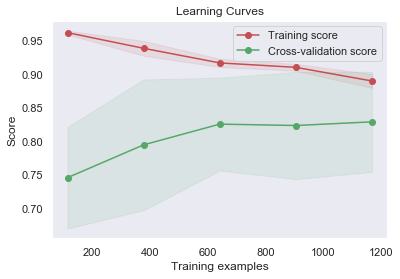

In [11]:
from plot_learning_curve import plot_learning_curve

title = 'Learning Curves'
plot_learning_curve(model,title,X,y,cv = cv_split)

As expected the linear regression suffers from high bias shown by the leveling out of the CV score in the above plot. More data is unlikely to help for this learning algorithm. Adding some nonlinear features would help with this but requires scrutiny of the data in order to decide which features are worth nonlinearizing. The problem with nonlinearizing the entire feature set is that the number of features would become much too large. 